In [16]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('Edu-Data.csv')

data.head()

if data.isnull().sum().any():
    print("Missing values detected:", data.isnull().sum())
else:
    print("No missing values in the dataset.")


No missing values in the dataset.


In [ ]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

data.head()


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [ ]:
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable


In [ ]:
k = 10  # 10-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)


In [ ]:
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'J48 (Decision Tree)': DecisionTreeClassifier(),
    'MLP': MLPClassifier(max_iter=1000, random_state=42)
}


In [ ]:
results = {}

for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    results[name] = scores
    print(f"{name} Classifier - Average Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}")


KNN Classifier - Average Accuracy: 0.63 ± 0.06
Naive Bayes Classifier - Average Accuracy: 0.72 ± 0.07
J48 (Decision Tree) Classifier - Average Accuracy: 0.71 ± 0.08
MLP Classifier - Average Accuracy: 0.68 ± 0.10


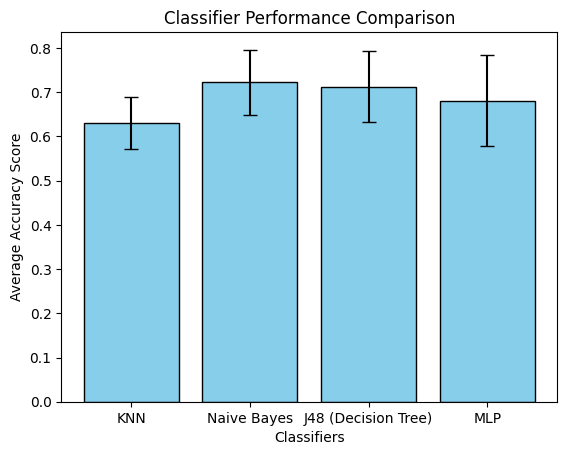

In [25]:
labels = list(results.keys())
mean_scores = [np.mean(scores) for scores in results.values()]
std_scores = [np.std(scores) for scores in results.values()]

plt.bar(labels, mean_scores, yerr=std_scores, capsize=5, color='skyblue', edgecolor='black')
plt.xlabel('Classifiers')
plt.ylabel('Average Accuracy Score')
plt.title('Classifier Performance Comparison')
plt.show()
